A copy of this notebook is available [here](https://gitlab.com/genepy3d/genepy3d.gitlab.io/-/blob/master/source/working_with_surface.ipynb).

# Working with surface

Surface in GeNePy3D is formulated as triangle mesh. It inherits from [Trimesh](https://trimsh.org/trimesh.html). Thus we assume most of the Trimesh's functions can be called by GeNePy3D Surface.

## Import surface

Surface can be imported from various file format. Please see *surfaces.available_formats()* for more detail. Below is a 3D mesh imported from stl file.

<IPython.core.display.Javascript object>


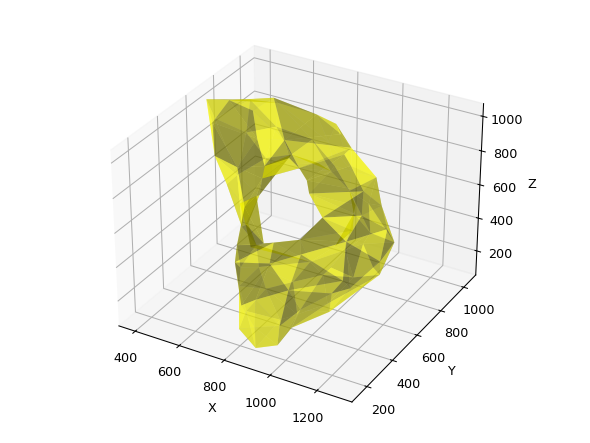

In [1]:
from genepy3d.obj import surfaces
import matplotlib.pyplot as plt
%matplotlib notebook

surf = surfaces.Surface.from_file("data/outline_alpha.stl")
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
surf.plot(ax,point_args={'alpha':0.3})
plt.tight_layout();

We can check the closeness of the surface by:

In [2]:
surf.is_watertight

False

We can change the display by setting the surface properties via `args_3d` argument. We plot the surface based on the [plot_trisurf()](https://matplotlib.org/stable/users/explain/toolkits/mplot3d.html#tri-surface-plots) from matplotlib. Please see the function input for more detail.

<IPython.core.display.Javascript object>


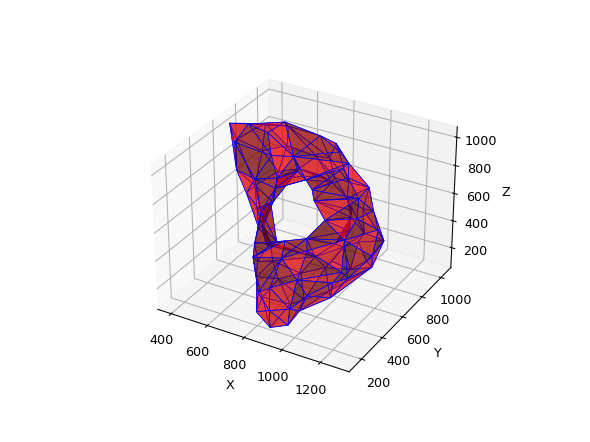

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
surf.plot(projection="3d",ax=ax,args_3d = {'edgecolor':'blue','color':'red','alpha':0.5,'linewidths':.5})

## Convex Hull

The script below computes the convex Hull that covers the surface as well as its area and volume:

<IPython.core.display.Javascript object>


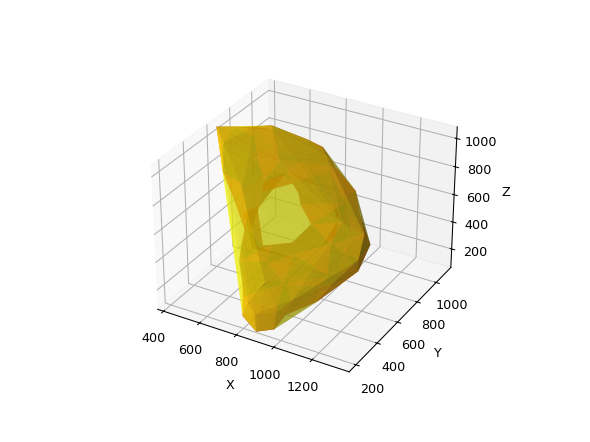

Convex Hull area 1641685.4485202227
Convex Hull volume: 123321084.33365473


In [4]:
surfhull = surf.get_qhull()

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
surf.plot(projection="3d",ax=ax,args_3d = {'edgecolor':'none','color':'red','alpha':0.5})
surfhull.plot(projection="3d",ax=ax,args_3d = {'edgecolor':'none','color':'yellow','alpha':0.5})
print("Convex Hull area",surfhull.area)
print("Convex Hull volume:",surfhull.volume)

Let's check again the closeness:

In [5]:
surfhull.is_watertight

True

We then can export the convex Hull surface into file:

In [6]:
surfhull.export("data/outline_convexhull.stl");

## Oriented bounding box

Oriented bounding box is the box that covers the surface and represents the principal orientation of the surface. We can then derive its area, volume, axis lengths and measure the sphericity of the surface.

<IPython.core.display.Javascript object>


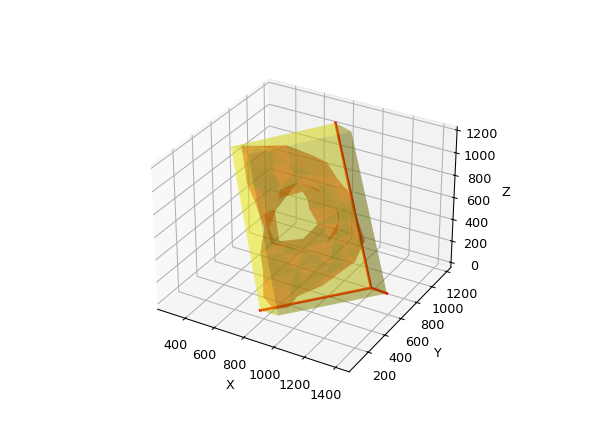

Oriented bounding box area: 2636524.0406177705
Oriented bounding box volume: 214537767.53719527
Oriented bounding box axes lengths: [ 259.636  680.433 1214.375]
Sphericity = 0.433707778372725


In [7]:
# Oriented bounding box
obbox = surf.get_obbox()

# Three axes of the oriented bounding box
edges_axis, edges_len = surf.get_obbox_axes()

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
surf.plot(projection="3d",ax=ax,args_3d = {'edgecolor':'none','color':'red','alpha':0.3,'linewidths':0.01})
obbox.plot(projection="3d",ax=ax,args_3d = {'edgecolor':'none','color':'yellow','alpha':0.3,'linewidths':0.005})
ax.plot(edges_axis[0][:,0], edges_axis[0][:,1], edges_axis[0][:,2],c="red",lw=2.)
ax.plot(edges_axis[1][:,0], edges_axis[1][:,1], edges_axis[1][:,2],c="red",lw=2.)
ax.plot(edges_axis[2][:,0], edges_axis[2][:,1], edges_axis[2][:,2],c="red",lw=2.)

print("Oriented bounding box area:",obbox.area)
print("Oriented bounding box volume:",obbox.volume)
print("Oriented bounding box axes lengths:",edges_len)
print("Sphericity =",surf.compute_sphericity())